In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import scipy.signal

In [2]:
FILENAME = "output.wav"
FS = 44100

In [3]:
# t = np.linspace(0, 3.0, int(3.0 * fs), endpoint=False)
#     x = scipy.signal.chirp(t, f0=500, f1=4000, t1=duration, method='linear')
#     x_padded = np.pad(x, (20000, 20000), "constant", constant_values=0)
#     channel_response = np.genfromtxt("channel.csv", delimiter=",")
#     dummy_y = np.convolve(x_padded, channel_response)
#     _, y = scipy.io.wavfile.read(recv_filename)

#     cross = np.correlate(x, y)
#     print(x.shape, y.shape, cross.shape)
#     max_index = np.argmax(np.abs(cross))
#     print(max_index)

#     fig, axs = plt.subplots(1, 2)
#     axs[0].plot(x)
#     axs[0].plot(y)
#     axs[1].plot(cross)
#     plt.show()

In [4]:
CHIRP_DURATION = 3.0
t = np.linspace(0, CHIRP_DURATION, int(CHIRP_DURATION * FS), endpoint=False)
x = scipy.signal.chirp(t, f0=500, f1=4000, t1=CHIRP_DURATION, method='linear')

In [5]:
_, y = scipy.io.wavfile.read(FILENAME)
y = y / np.max(np.abs(y))

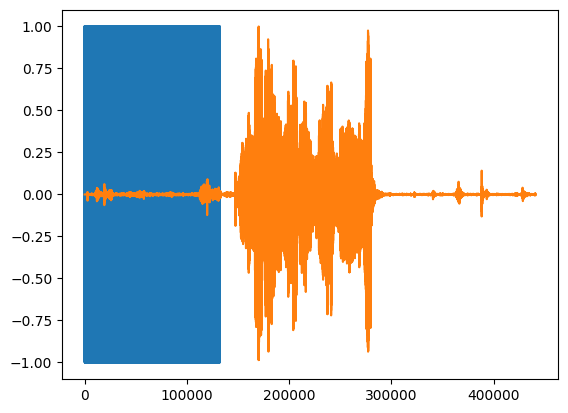

In [6]:
plt.plot(x)
plt.plot(y)

In [7]:
cross = np.correlate(x, y)

In [8]:
print(x.shape, y.shape, cross.shape)

(132300,) (441000,) (308701,)


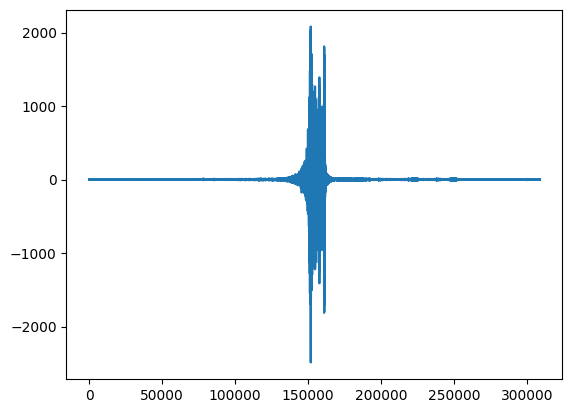

In [9]:
plt.plot(cross)

In [10]:
max_index = np.argmax(np.abs(cross))
x_shifted = np.pad(x, (max_index + 5148, 0), "constant", constant_values=0)
x_shifted = np.pad(x_shifted, (0, (y.size - x_shifted.size)), "constant", constant_values=0)

In [11]:
print(np.sum(x_shifted * y))
print(np.max(np.abs(cross)))
print(max_index)
print(np.argmin(np.abs(cross - np.sum(x_shifted * y))))

-2489.2482826505807
2489.24828265058
151776
151776


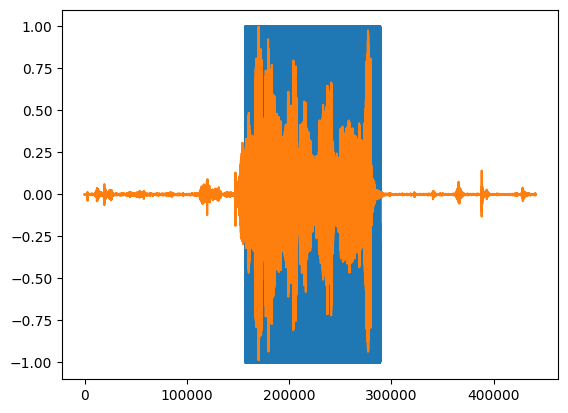

In [12]:
plt.plot(x_shifted)
plt.plot(y)